In [1]:
import pandas as pd
from tools import find_path
import numpy as np
from model import Model

model = Model(preproc="TF_IDF",model="SVM" , parameters={"C":1.0,'probability':True})

In [2]:
df = pd.read_csv("FQUAD.csv")

In [3]:
df = df.drop(['ENG', 'ROLE SEMANTIQUE','COMMENTAIRES'], axis=1)
df = df.dropna()

In [4]:
df = df.rename(columns={"QUESTION": "X", "TYPE ENTITE": "y"})

In [5]:
df.head()

,X,y
0,"A quoi correspondent les trois années 1967, 19...",Event
1,Dans l'exemple combien de lettres y a-t-il dan...,Measure
2,En quelle année était prévue la sortie initial...,Time
3,Qu'est ce qui contraste avec le Mont Chauve?,Thing
4,Quel est le terminus sud de la ligne 7 selon l...,Location


In [6]:
df_c = df.copy()
df_c["y"] = df_c["y"].apply(find_path,args=(1,))
model.fit(df_c)

accuracy :  0.9782318969346957


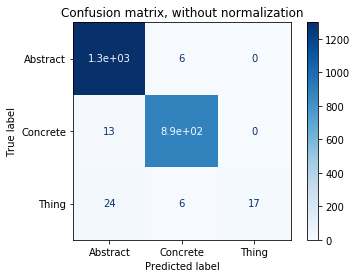

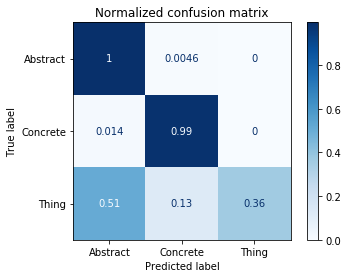

In [7]:
model.graph()

In [8]:
df_c = df.copy()
df_c["y"] = df_c["y"].apply(find_path,args=(2,))

In [9]:
df_c = df_c.groupby('y')
df_c = df_c.filter(lambda x: len(x) > 1)
model.fit(df_c)
model.graph()

accuracy :  0.9715681919147046


In [11]:
df_c = df.copy()
df_c["y"] = df_c["y"].apply(find_path,args=(3,))
model.fit(df_c)

accuracy :  0.9671111111111111


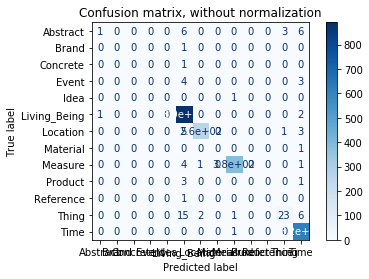

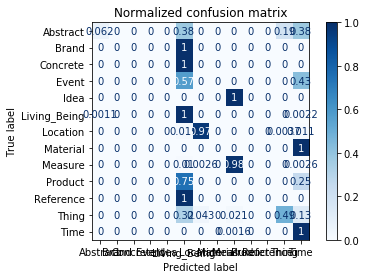

In [12]:
model.graph()

In [13]:
model.details()

Model :  SVM
Pre-processing :  TF_IDF
length trainning :  5248
length evluation :  2250
Accuracy :  0.9671111111111111
